## AT&T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    speed_breakdown, 
    unserved, 
    bucket_and_bin
)

In [3]:
# inputs
fn_att = '../data/output/speed_price_att.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_att.csv'
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [4]:
att = pd.read_csv(fn_att, compression='gzip')
len(att)

432303

In [5]:
att.major_city.nunique()

20

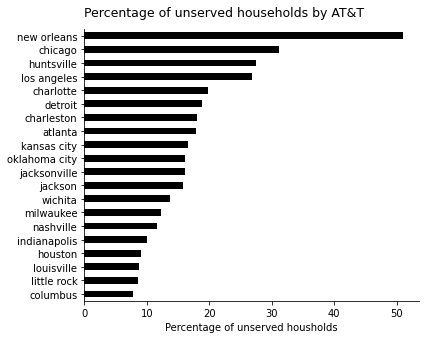

In [6]:
unserved(att, isp='AT&T')

In [7]:
att = att[att.speed_down != 0]
len(att)

349703

In [8]:
att = bucket_and_bin(att)

In [9]:
# who gets options?
att[(att['speed_down'] != att['fastest_speed_down']) &
    (~att['fastest_speed_down'].isnull())]['speed_down'].value_counts(normalize=True)

300.0     0.999974
500.0     0.000007
100.0     0.000007
2000.0    0.000007
25.0      0.000007
Name: speed_down, dtype: float64

In [10]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in att.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = pd.concat([city2speeds, row])
city2speeds.to_csv(fn_speed, index=False)

In [11]:
variety = att.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

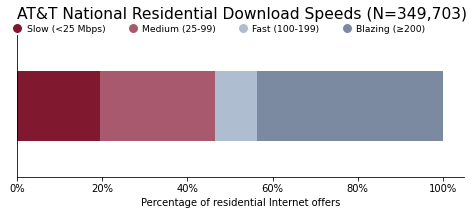

In [12]:
speed_breakdown(att)

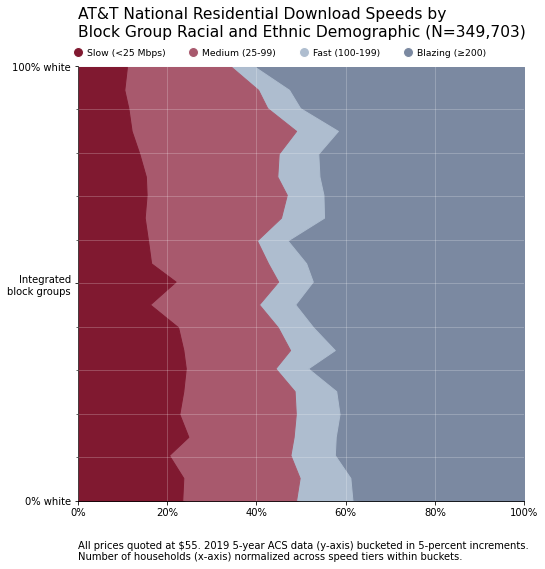

In [13]:
plot_race(att)

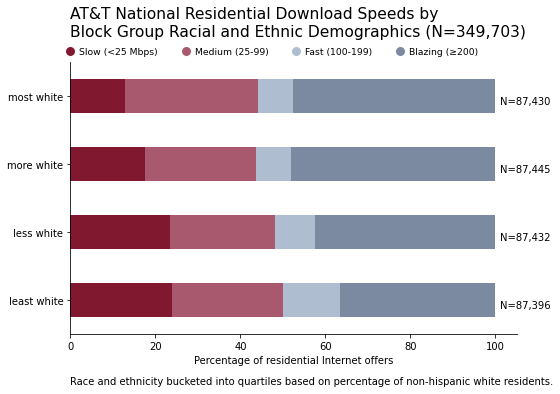

In [14]:
race(att)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


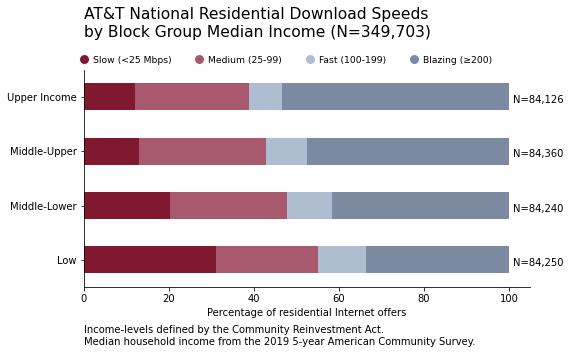

In [15]:
income(att)

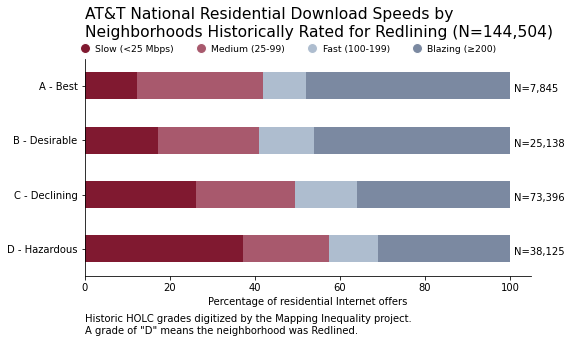

In [16]:
redlining(att)

## City by City

atlanta


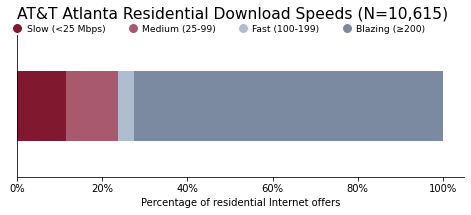

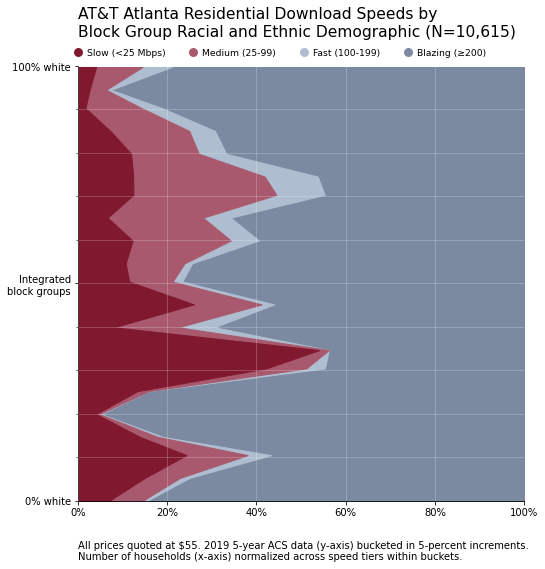

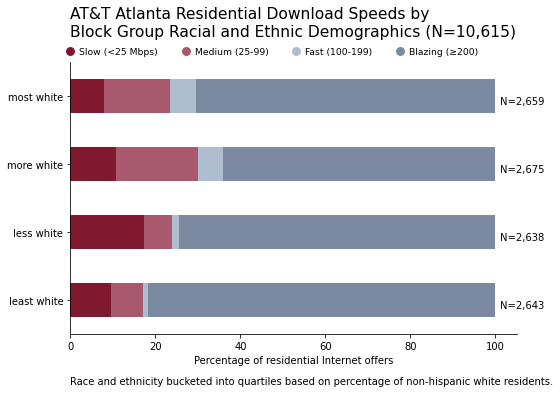

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


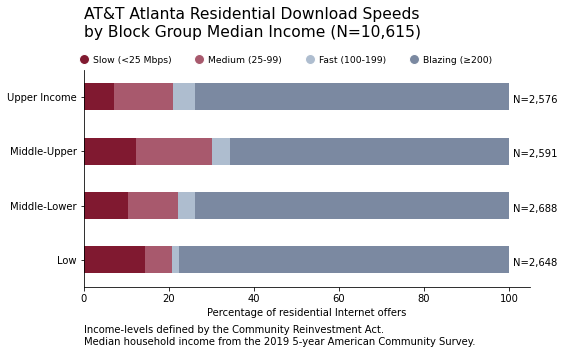

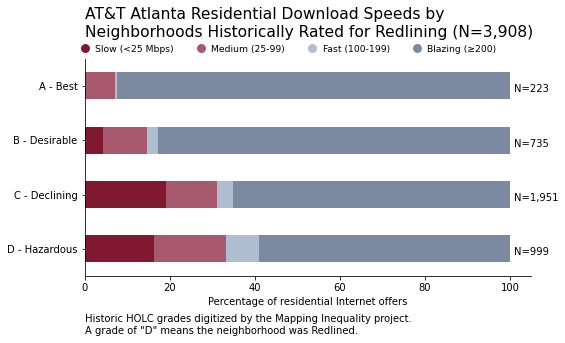

*******************************************************************************
charleston


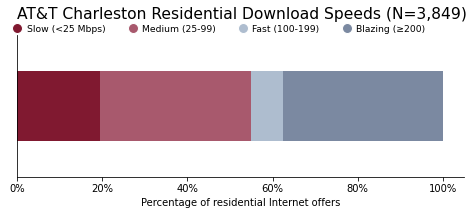

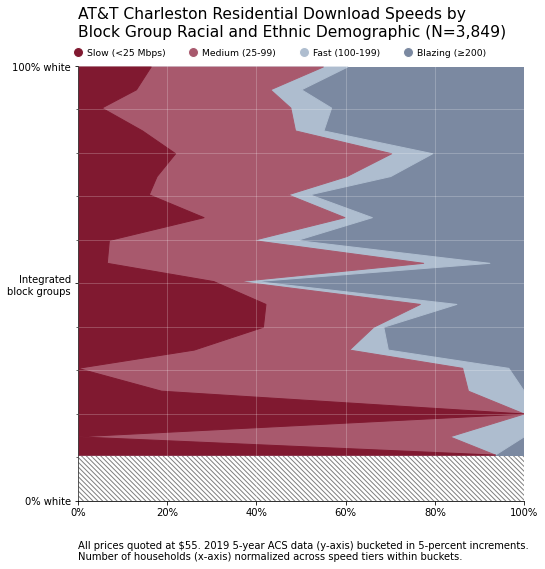

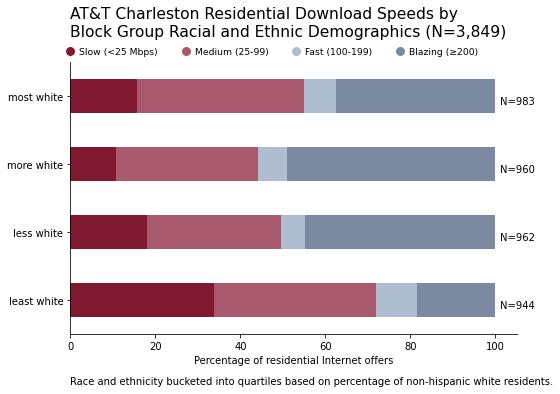

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


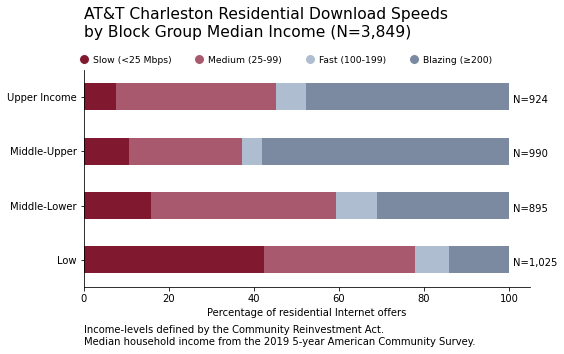

*******************************************************************************
charlotte


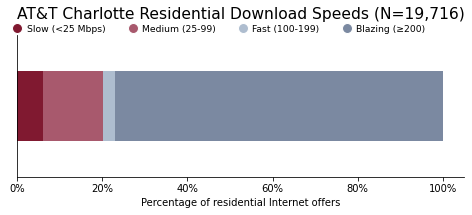

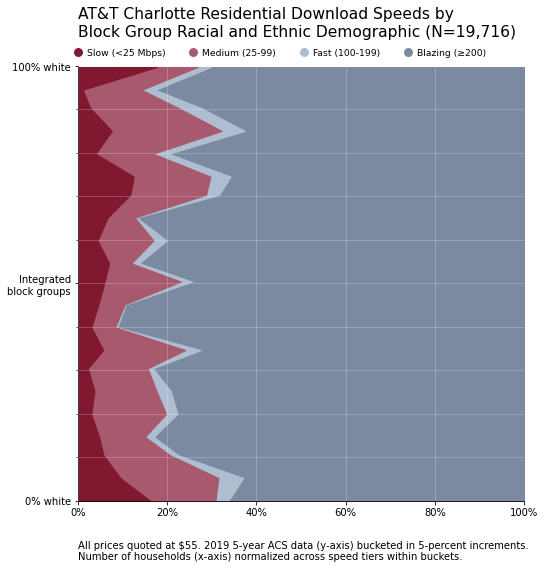

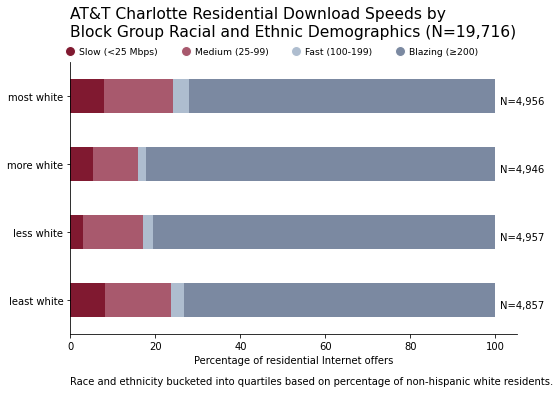

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


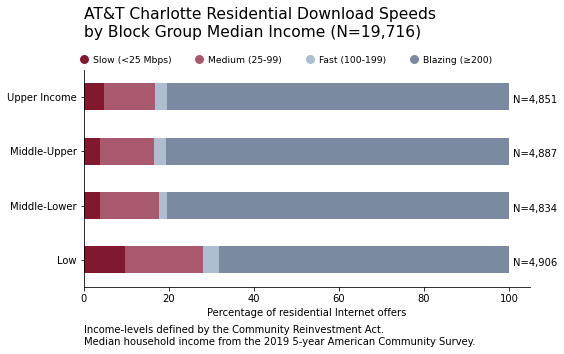

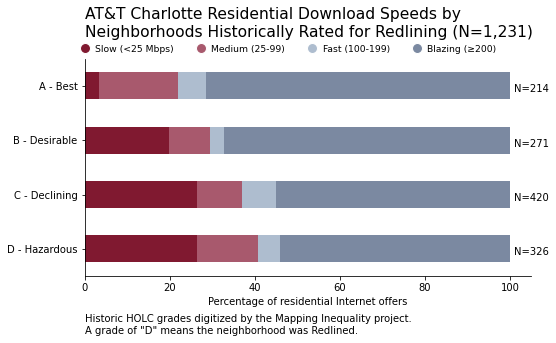

*******************************************************************************
chicago


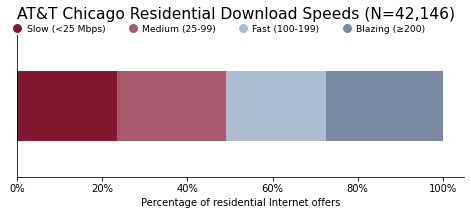

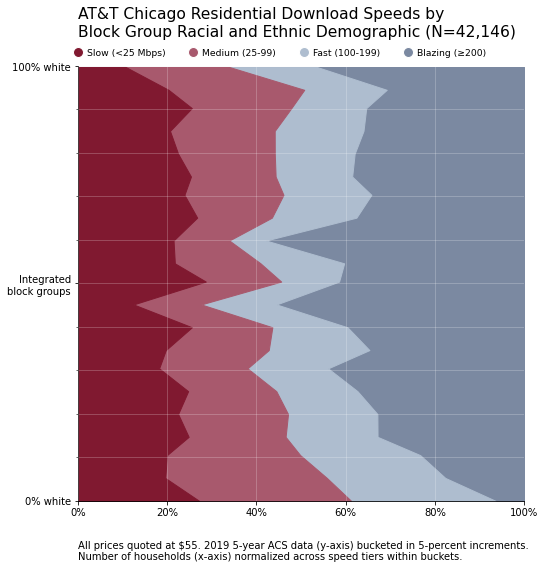

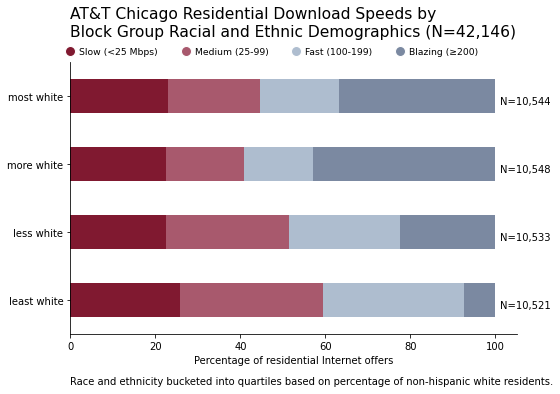

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


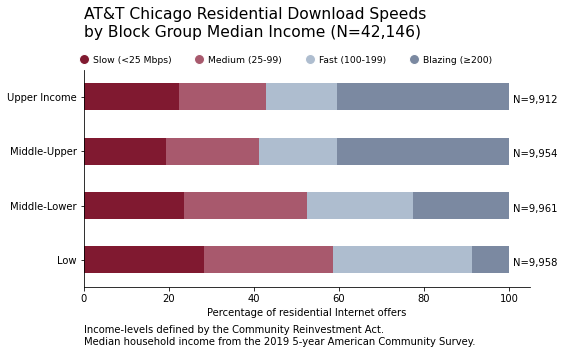

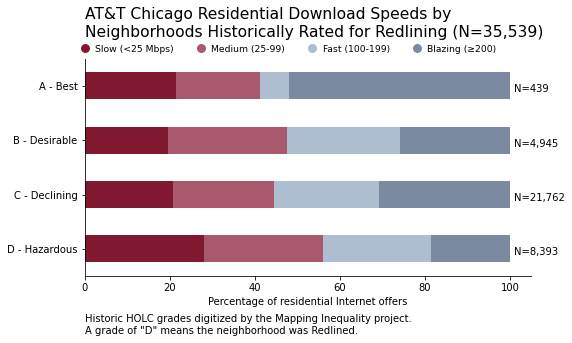

*******************************************************************************
columbus


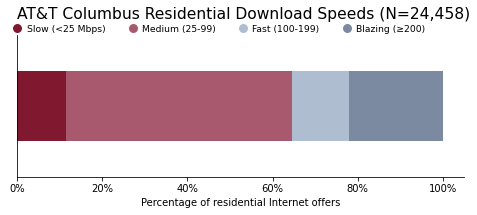

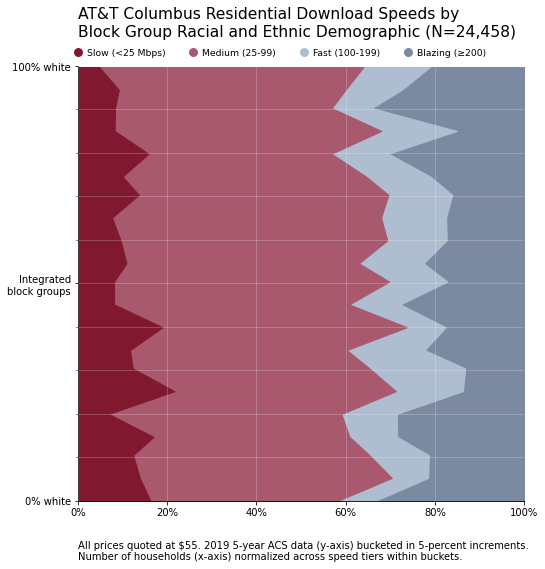

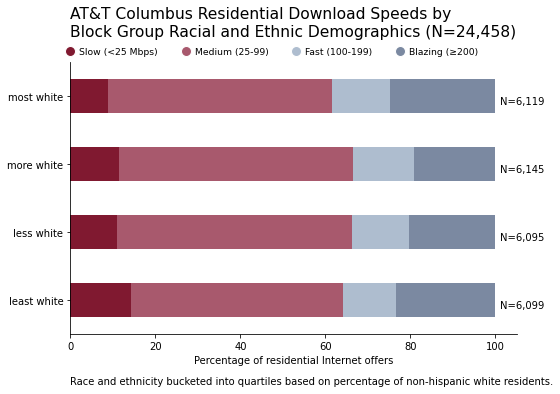

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


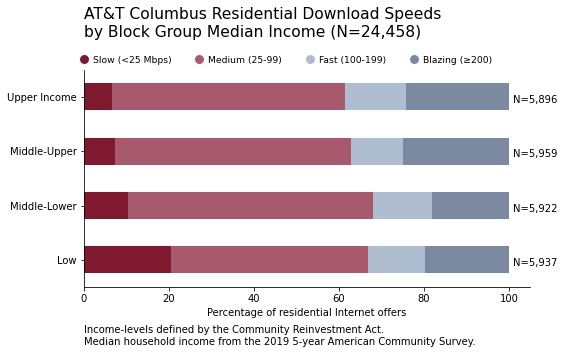

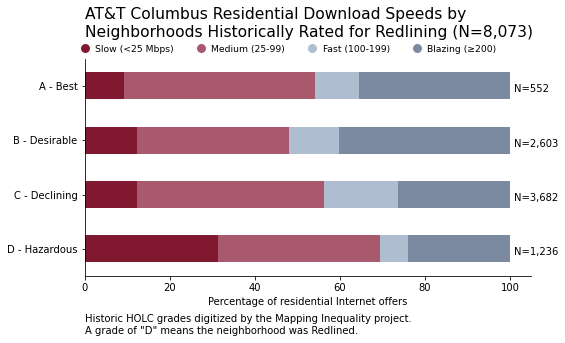

*******************************************************************************
detroit


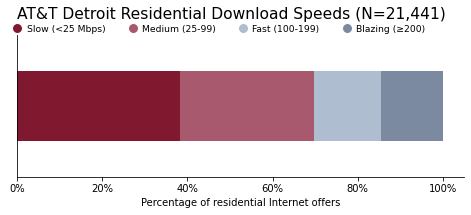

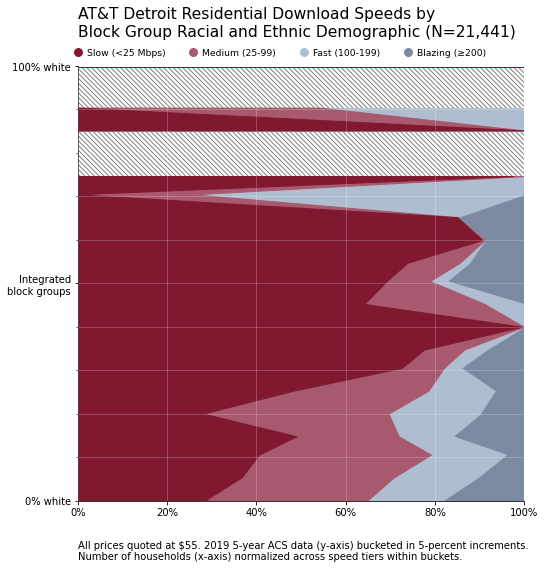

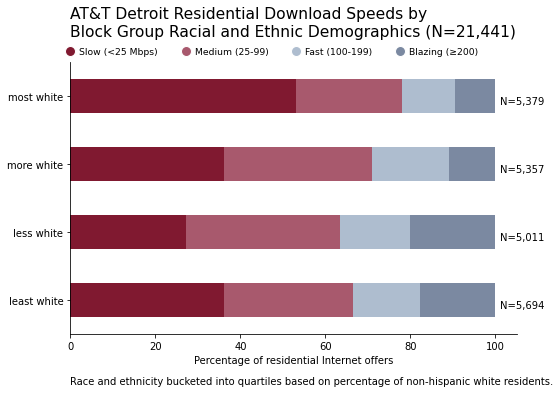

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


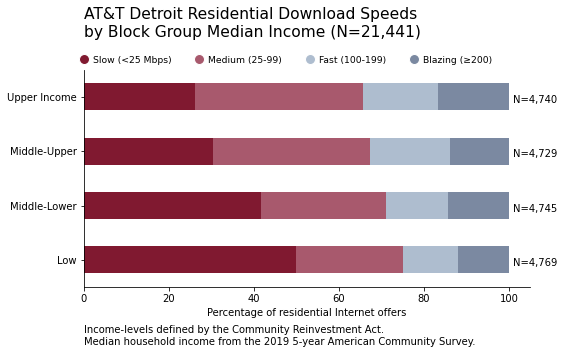

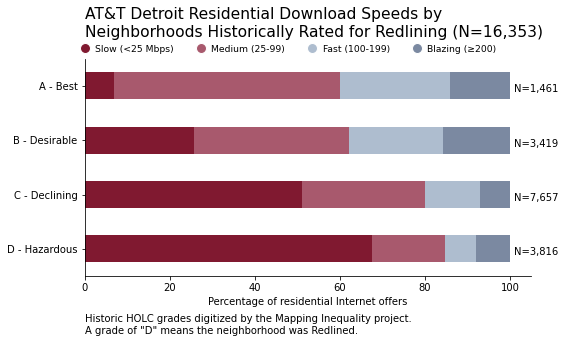

*******************************************************************************
houston


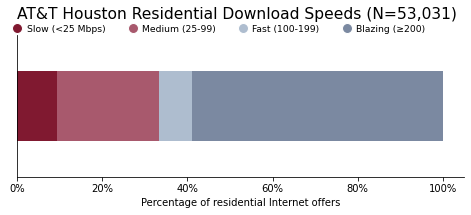

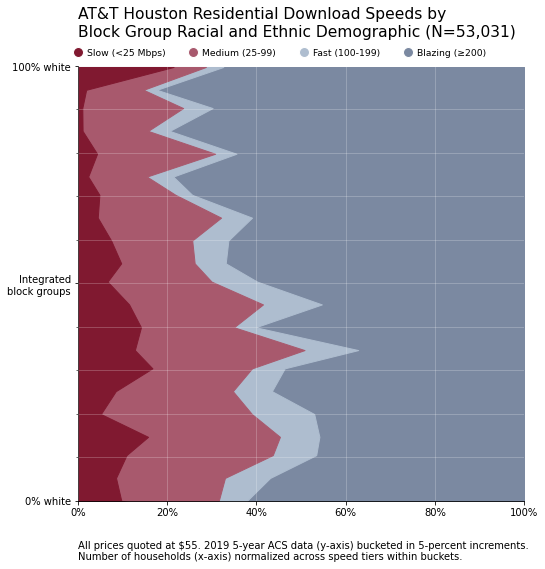

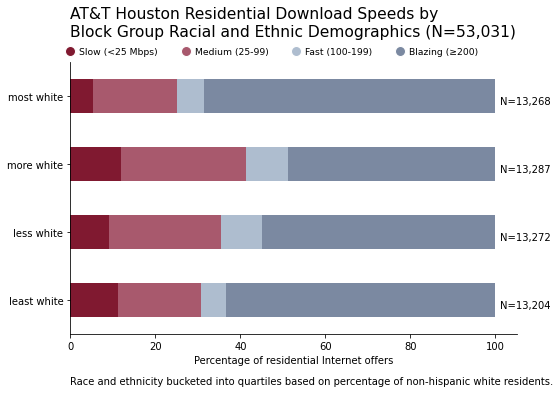

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


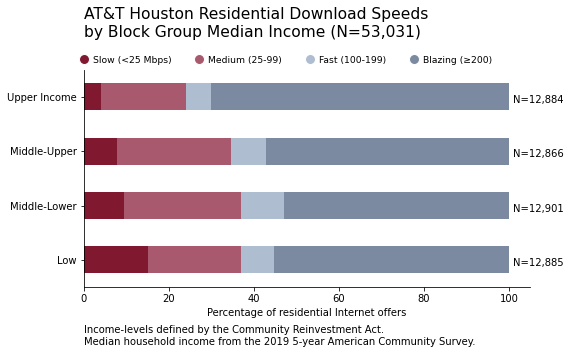

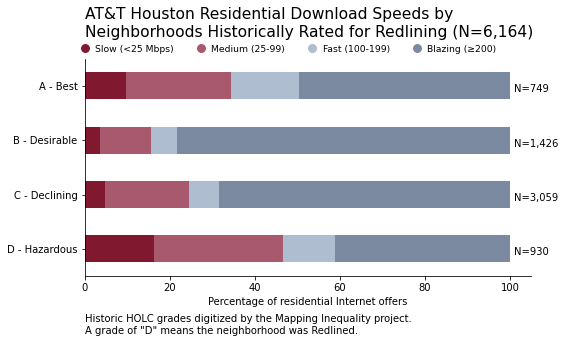

*******************************************************************************
huntsville


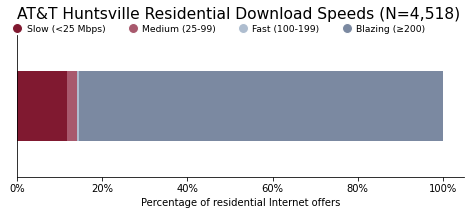

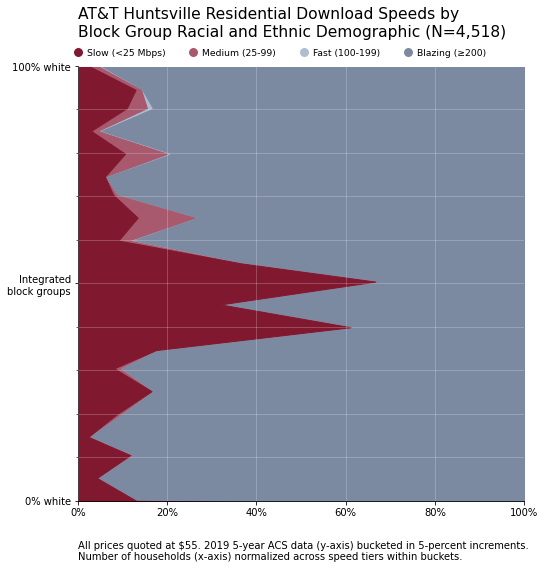

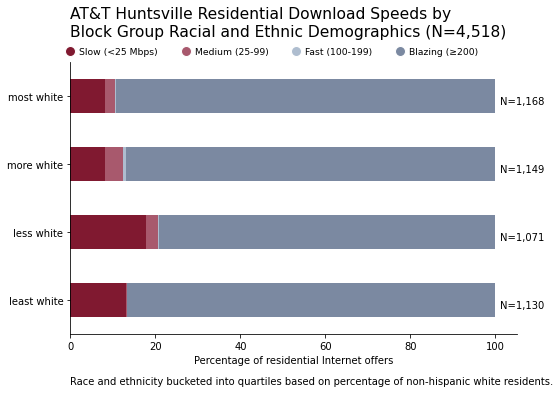

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


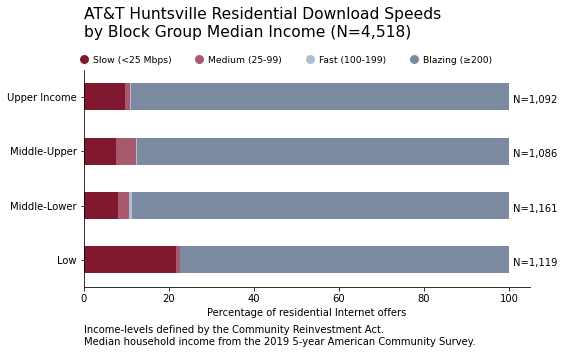

*******************************************************************************
indianapolis


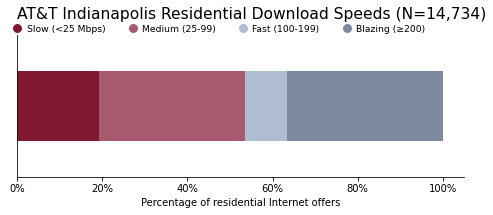

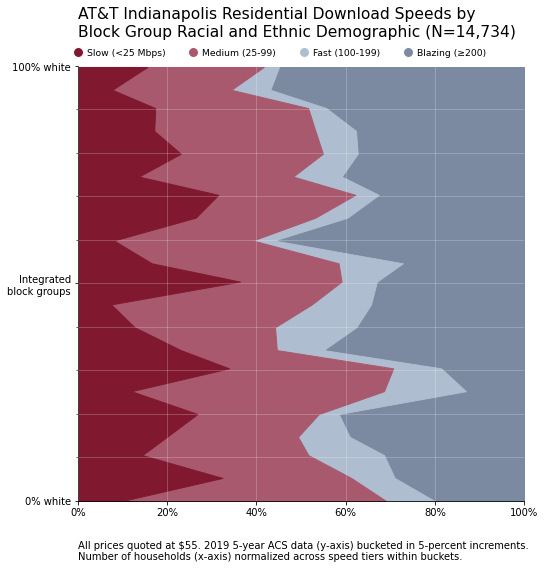

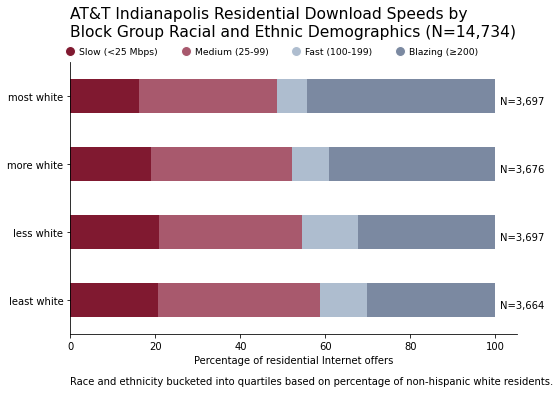

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


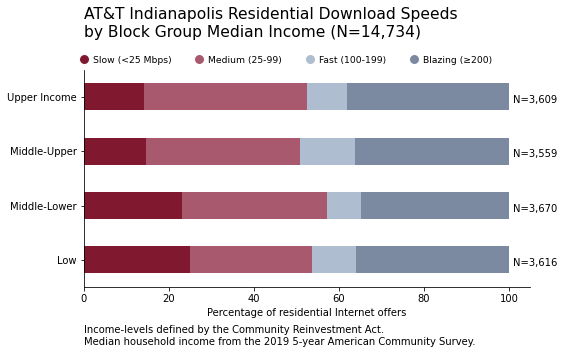

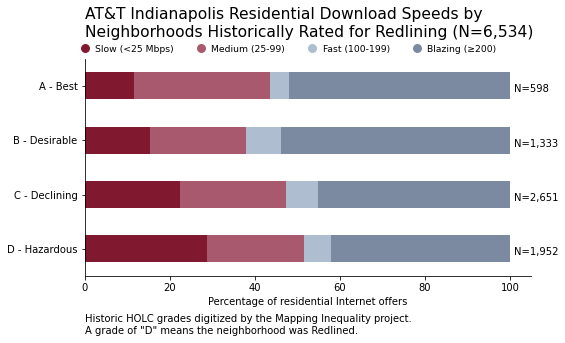

*******************************************************************************
jackson


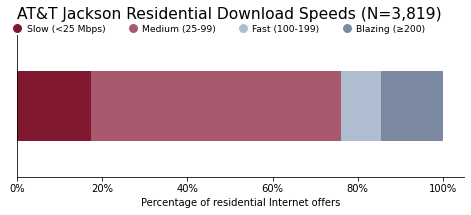

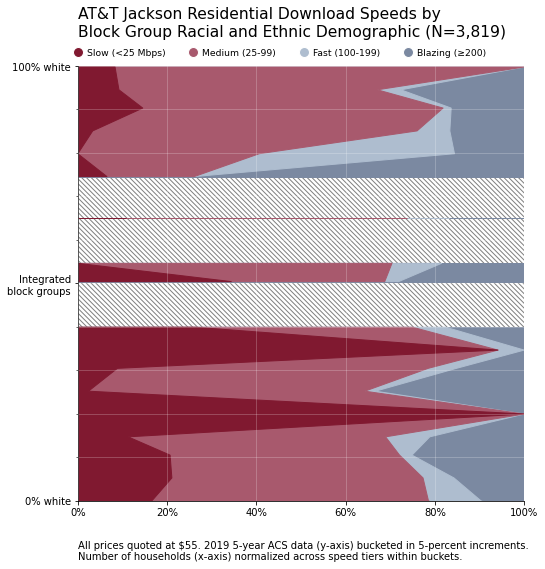

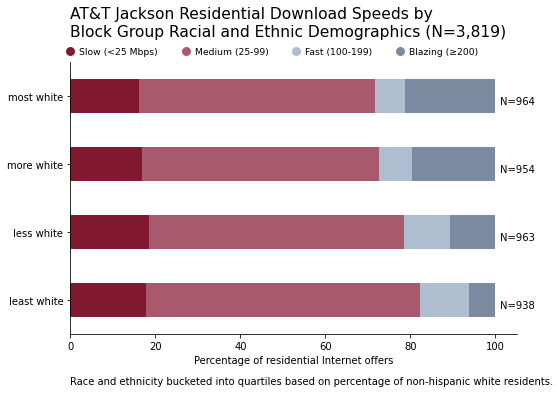

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


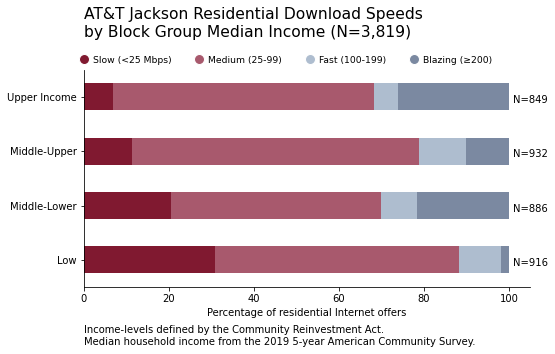

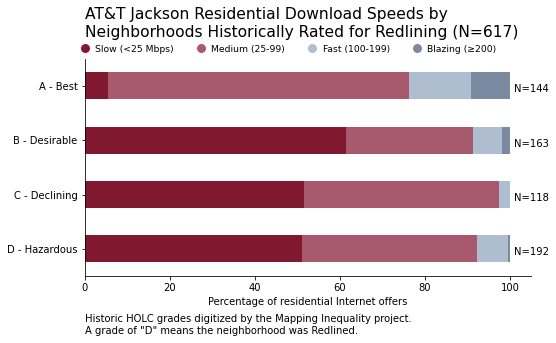

*******************************************************************************
jacksonville


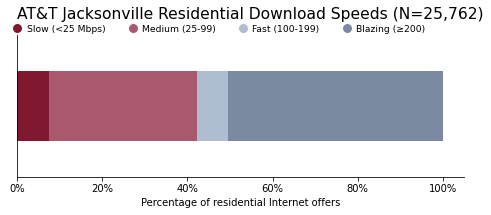

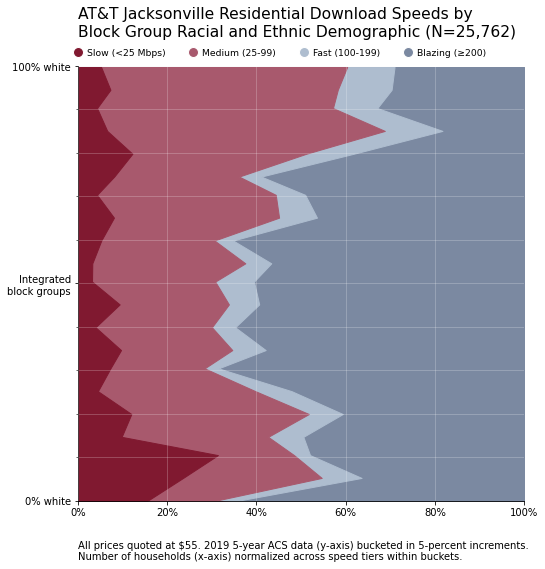

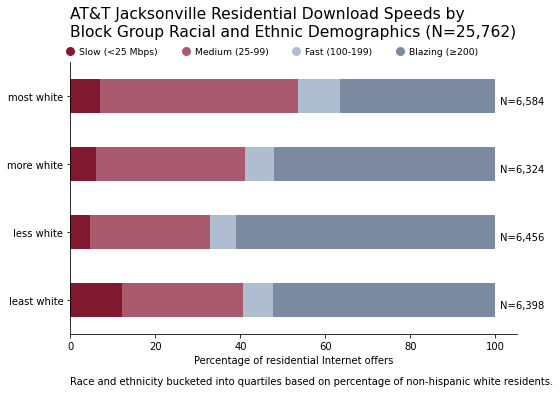

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


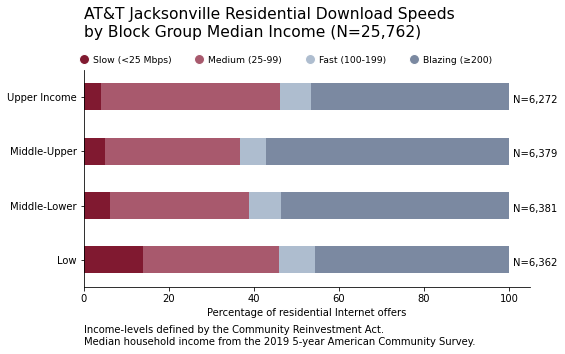

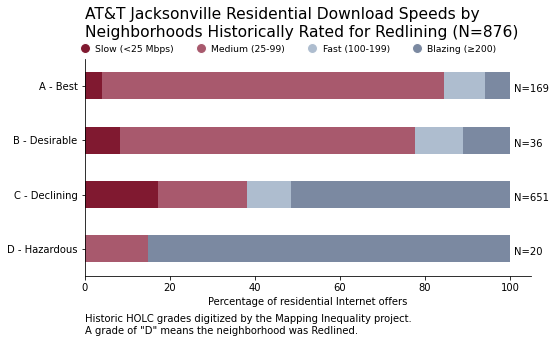

*******************************************************************************
kansas city


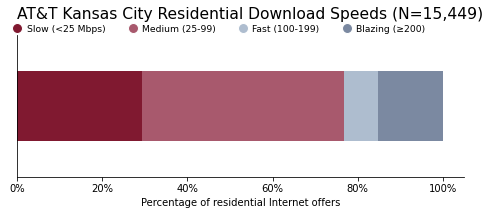

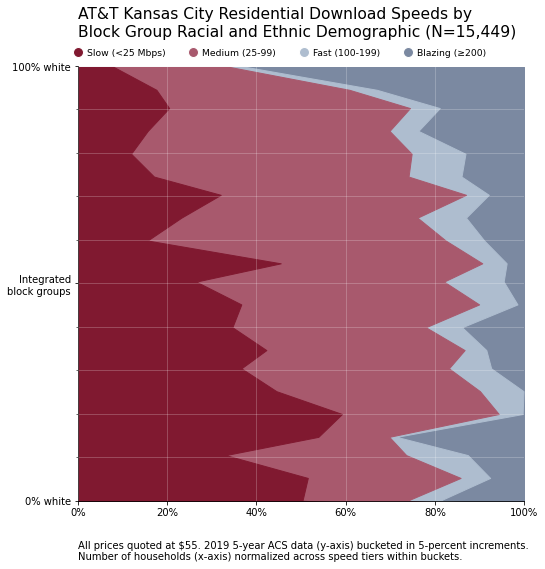

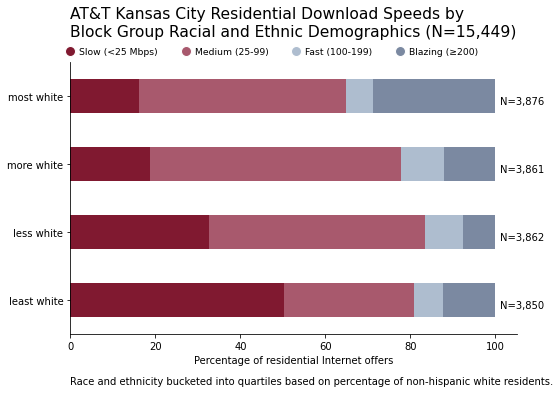

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


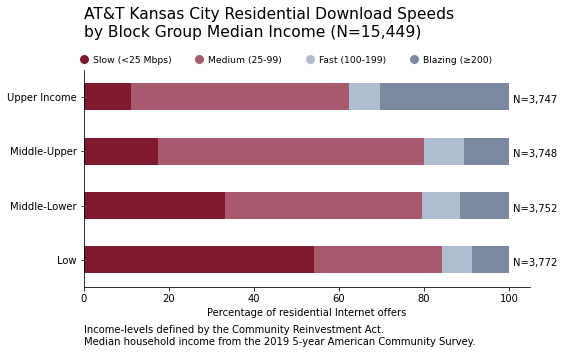

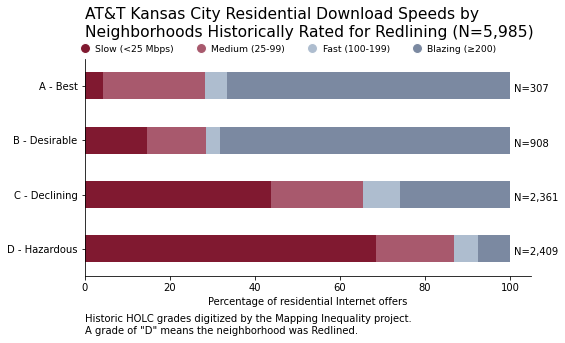

*******************************************************************************
little rock


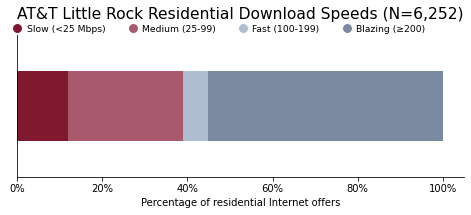

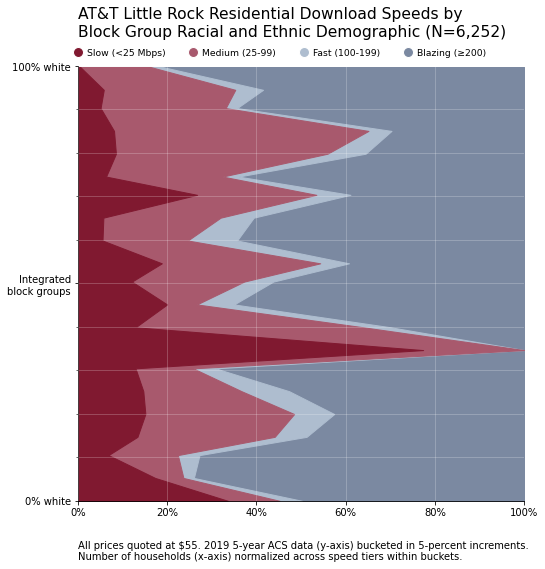

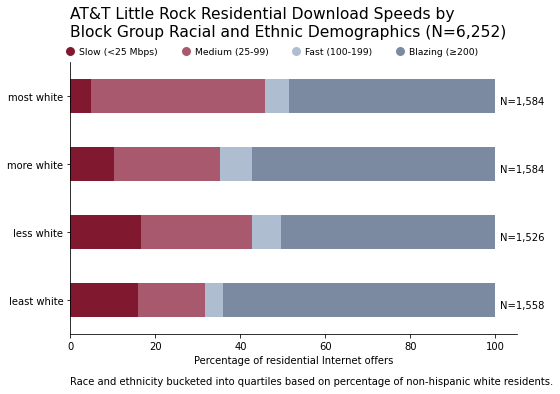

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


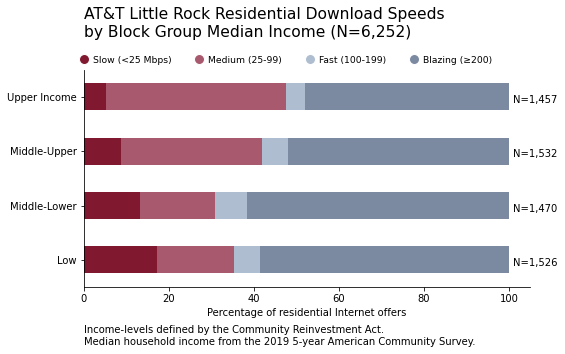

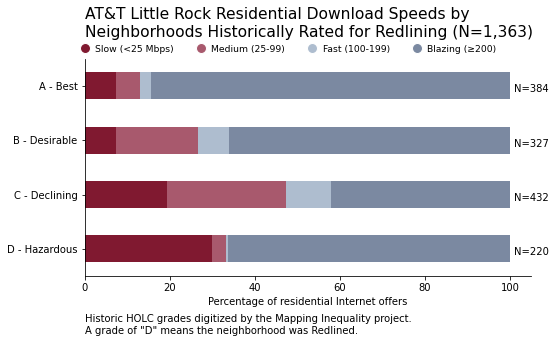

*******************************************************************************
los angeles


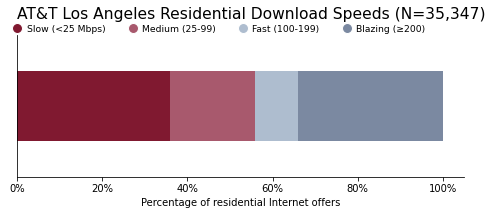

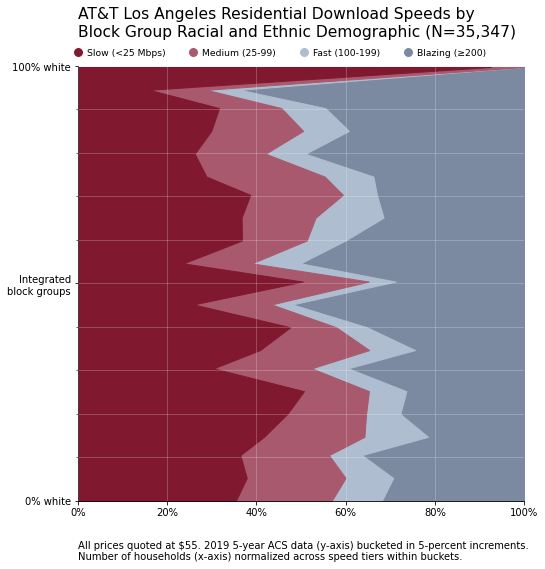

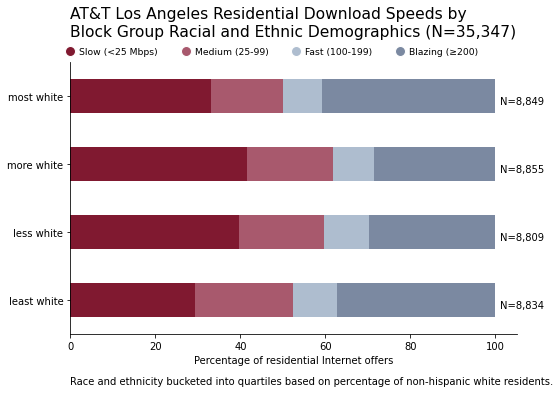

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


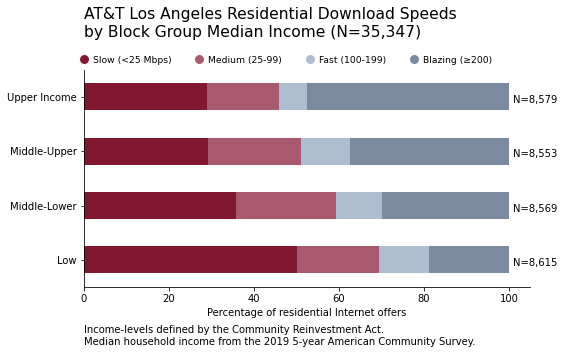

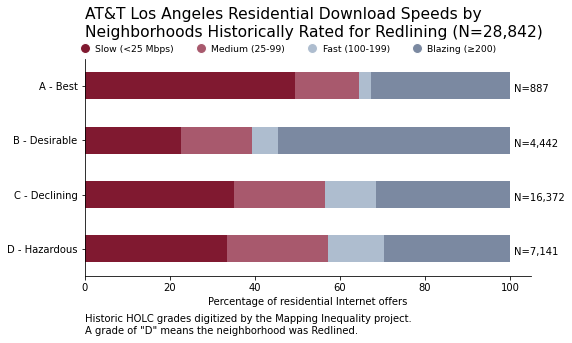

*******************************************************************************
louisville


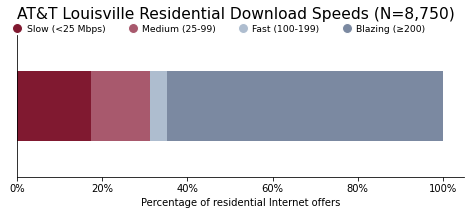

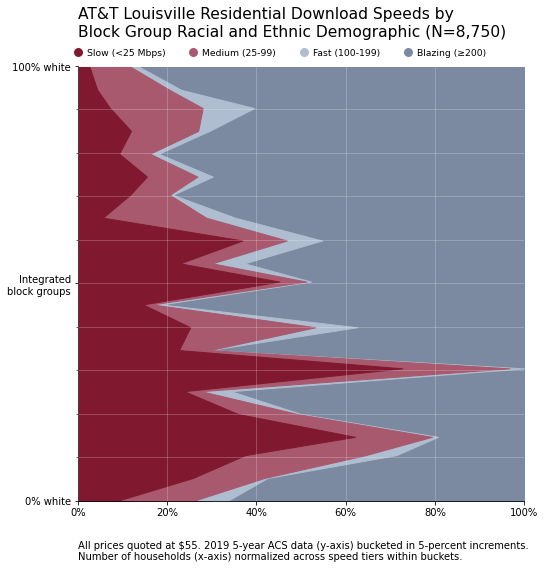

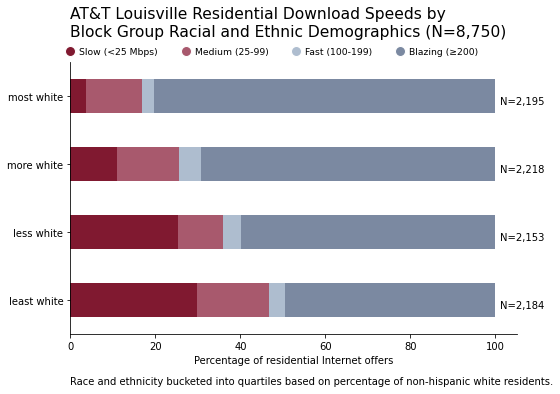

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


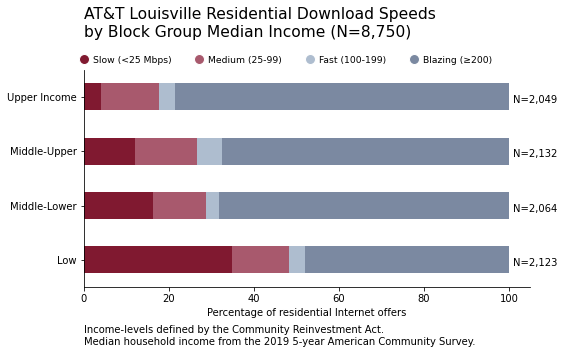

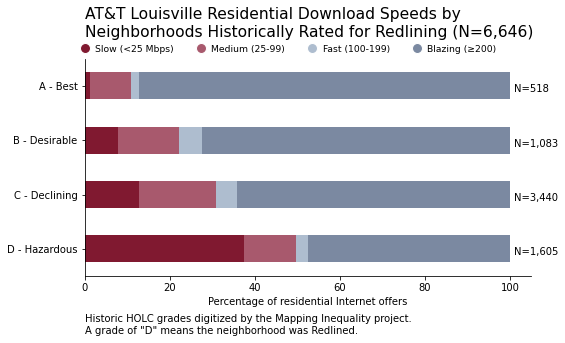

*******************************************************************************
milwaukee


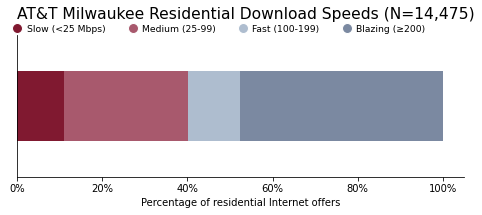

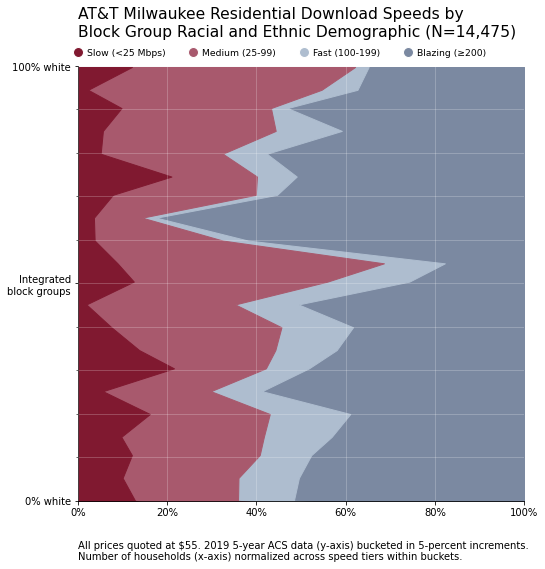

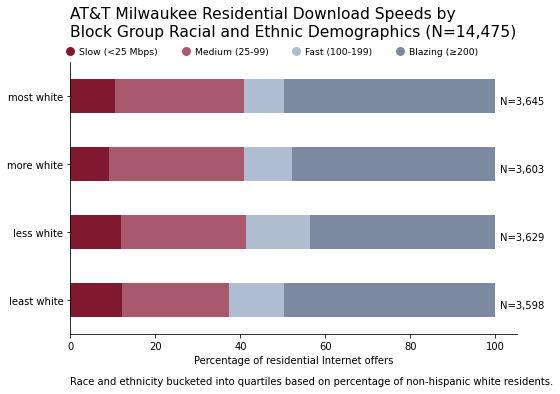

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


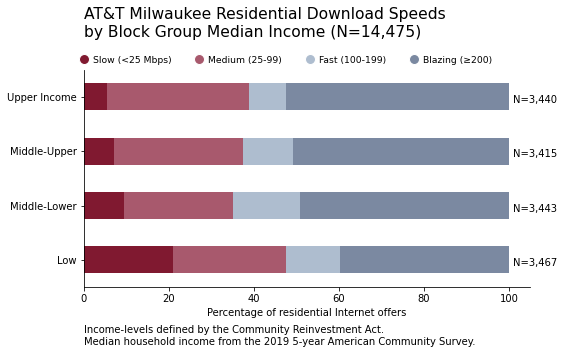

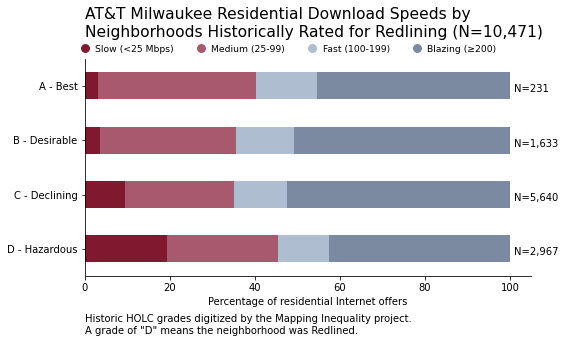

*******************************************************************************
nashville


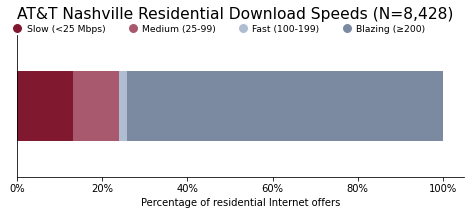

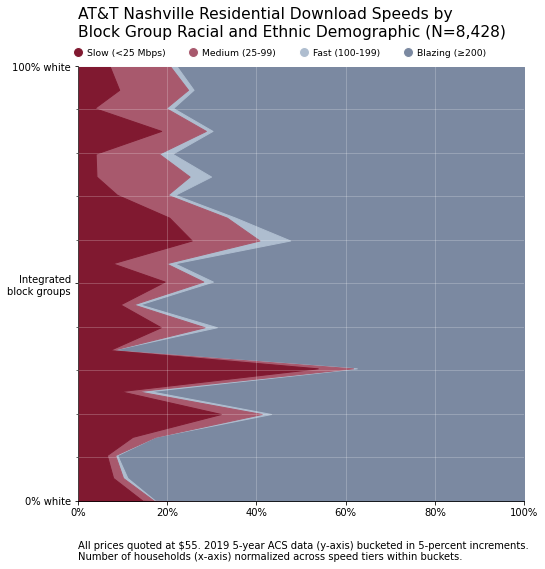

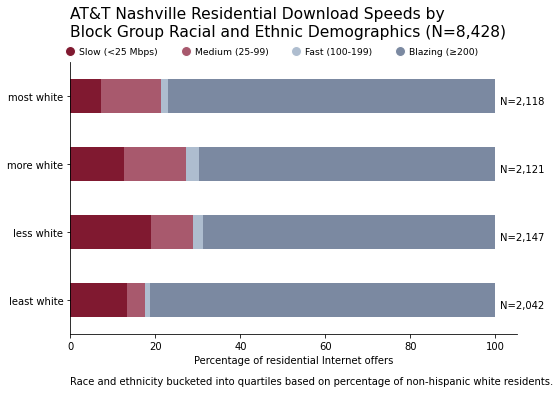

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


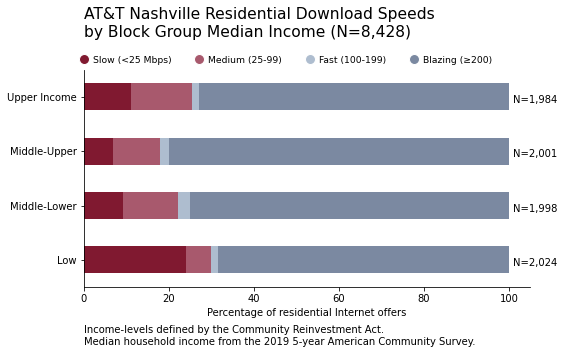

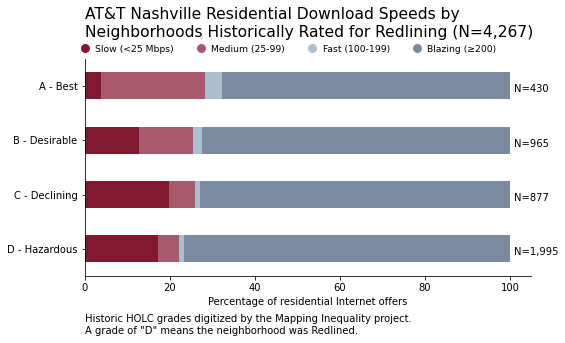

*******************************************************************************
new orleans


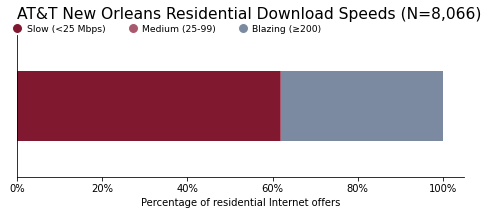

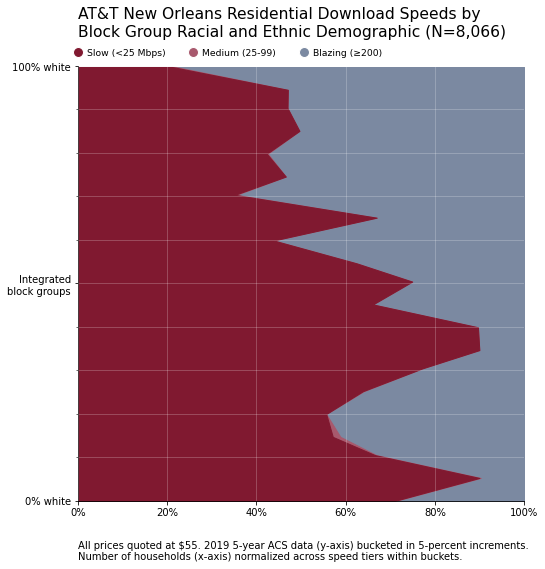

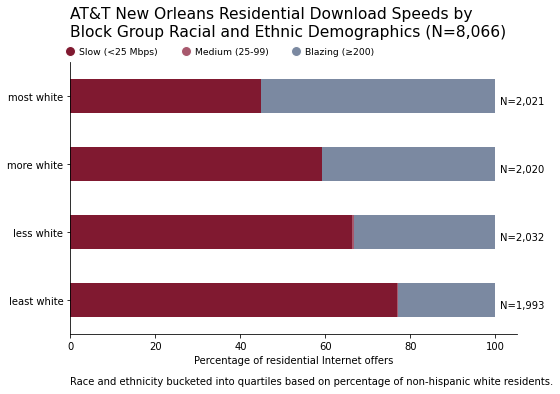

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


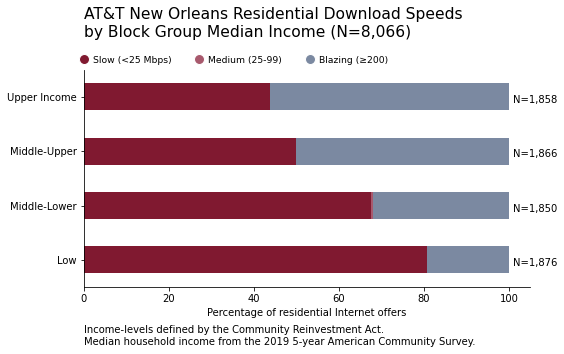

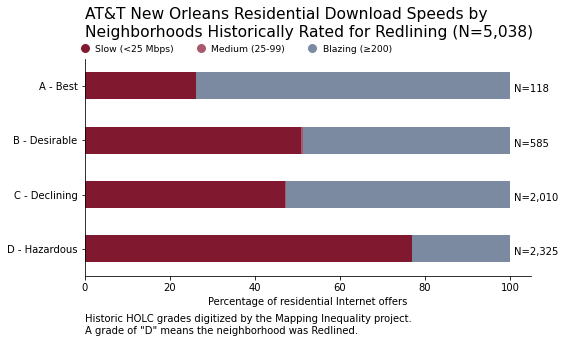

*******************************************************************************
oklahoma city


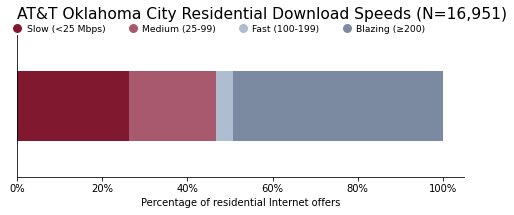

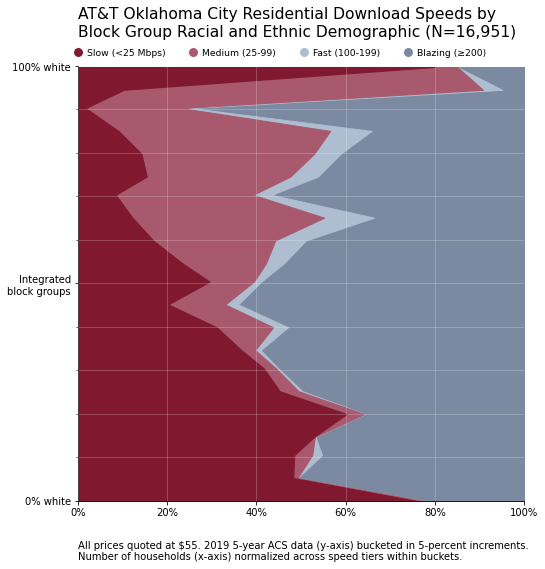

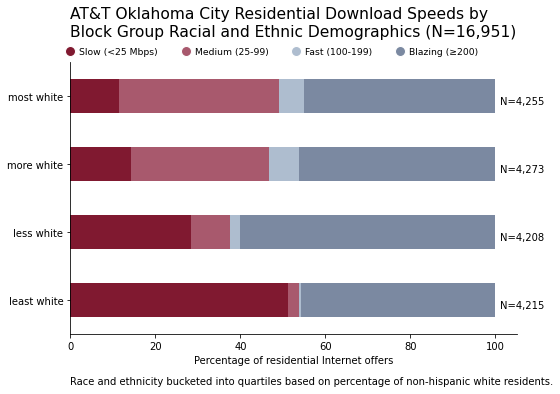

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


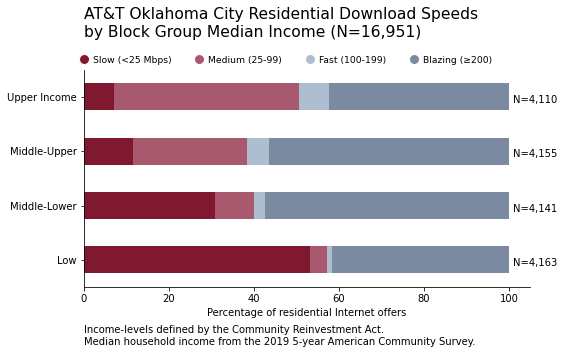

*******************************************************************************
wichita


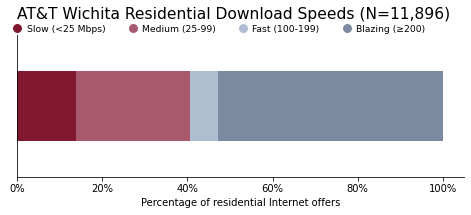

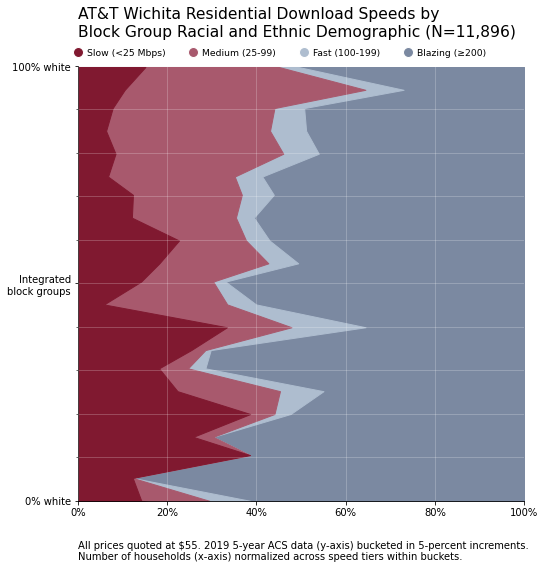

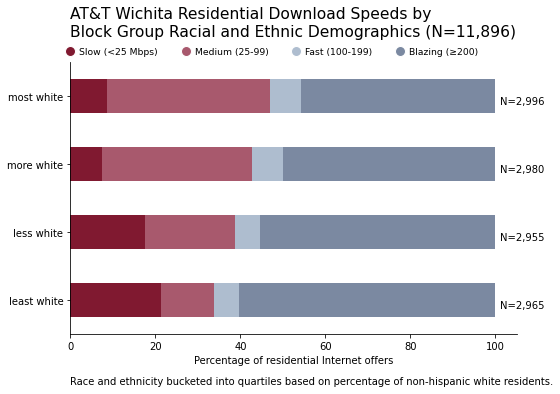

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


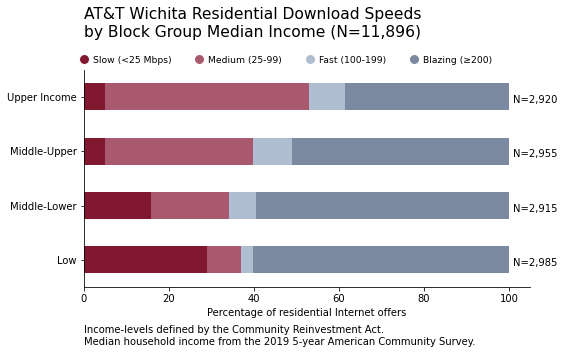

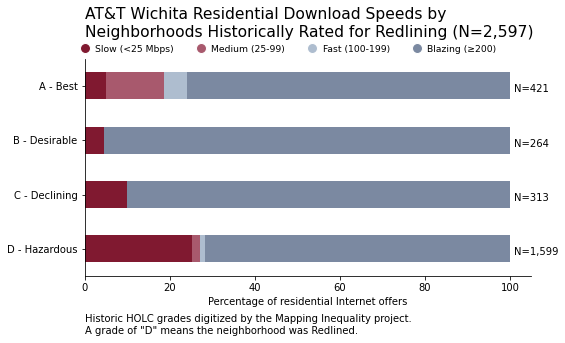

*******************************************************************************


In [17]:
for city, _df in att.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title())
    plot_race(_df, location=city.title())
    race(_df, location=city.title())
    income(_df, location=city.title())
    redlining(_df, location=city.title())
    fn_out = f'../data/intermediary/maps/att/{city}_offers.csv'
    if not os.path.exists(fn_out):
        os.makedirs(os.path.dirname(fn_out), exist_ok=True)
        _df.to_csv(fn_out, index=False)
    print("*" * 79)

## One city's graphs as an example

In [18]:
from pandas.api.types import CategoricalDtype
from config import income_labels

In [19]:
# outputs
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [20]:
df_city = bucket_and_bin(att[att.major_city == 'kansas city'])

In [21]:
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3a)

<ipython-input-21-e28746b9c62d>:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_city.loc[:, 'income_level'] = df_city['income_level'].astype(


In [22]:
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3b)

In [23]:
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3c)

In [24]:
# outputs
fn_fig_story_a = '../data/output/figs/story_income_{city}.csv'
fn_fig_story_b = '../data/output/figs/story_race_{city}.csv'
fn_fig_story_c = '../data/output/figs/story_redline_{city}.csv'

In [25]:
for city in ['new orleans']:
    df_city = bucket_and_bin(att[att.major_city == city])
    df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
         CategoricalDtype(income_labels, ordered=True)
    ).copy(deep=True)

    to_plot = (df_city.groupby('income_level').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_a.format(city=city.replace(' ', '_')))
    to_plot = (df_city.groupby('race_quantile').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_b.format(city=city.replace(' ', '_')))
    to_plot = (df_city.groupby('redlining_grade').speed_down_bins
                 .value_counts(normalize=True)
                 .sort_index() * 100 ).unstack()
    to_plot['major_city'] = city
    to_plot.to_csv(fn_fig_story_c.format(city=city.replace(' ', '_')))

<ipython-input-25-1fc2c4f5d3da>:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_city.loc[:, 'income_level'] = df_city['income_level'].astype(


In [26]:
# how many addresses got 6 Mbps or less
len(att[att.speed_down <= 6])

33671

In [27]:
# how many cities got 6 Mbps or less
att[att.speed_down <= 6].major_city.nunique()

20

In [28]:
# how many addresses below 25 Mbps were also offered an upgrade?
att[(att.speed_down < att.fastest_speed_down) & 
    (att.speed_down < 25)]

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,...,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,income_level,speed_down_bins,race_quantile,is_slow,race_perc,color
